Données concernant la glace de mer dans l'Arctique, une zone géographique située autour du Pôle Nord.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

In [4]:
# Définition du répertoire de travail
HOME_DIR = Path.cwd().parent
DATA_DIR = Path(HOME_DIR, "my_data_folder")
print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")

Work directory: d:\Cours 2AD ENSAE\Projet stat choix 
Data directory: d:\Cours 2AD ENSAE\Projet stat choix\my_data_folder


In [5]:
import xarray as xr

# Ouvrir le fichier NetCDF
ds = xr.open_dataset(r"my_data_folder/Fonte des glaces/2019/201908_mm-nersc-MODEL-nextsimf-ARC-fv00.0 (1).nc")

# Afficher les métadonnées du fichier
print(ds)


FileNotFoundError: [Errno 2] No such file or directory: 'd:\\Cours 2AD ENSAE\\Projet stat choix\\Data\\my_data_folder\\Fonte des glaces\\2019\\201908_mm-nersc-MODEL-nextsimf-ARC-fv00.0 (1).nc'

In [2]:
print(ds.variables)

Frozen({'x': <xarray.IndexVariable 'x' (x: 304)> Size: 1kB
array([-3837500., -3812500., -3787500., ...,  3687500.,  3712500.,  3737500.],
      dtype=float32)
Attributes:
    standard_name:          projection_x_coordinate
    coverage_content_type:  coordinate
    long_name:              x
    units:                  meters
    axis:                   X, 'y': <xarray.IndexVariable 'y' (y: 448)> Size: 2kB
array([ 5837500.,  5812500.,  5787500., ..., -5287500., -5312500., -5337500.],
      dtype=float32)
Attributes:
    standard_name:          projection_y_coordinate
    coverage_content_type:  coordinate
    long_name:              y
    units:                  meters
    axis:                   Y, 'time': <xarray.IndexVariable 'time' (time: 44)> Size: 352B
array([cftime.DatetimeJulian(1979, 1, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1980, 1, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1981, 1, 1, 0, 0, 0, 0, has_year_zero=False),
       

In [5]:
print(f"Nombre de variables dans le fichier : {len(ds.variables)}")


Nombre de variables dans le fichier : 17


In [6]:
df = ds.to_dataframe().reset_index()
df.head()


,y,x,time,nv,stereographic,longitude,latitude,time_bnds,siconc,sithick,sisnthick,vxsi,vysi,sialb,siage,siconc_my,siconc_young,si_ridge_ratio
0,-4300000.0,-3600000.0,2019-08-16 12:00:00,0,-127,-84.936386,42.537518,2019-08-01,NaN,NaN,NaN,NaN,NaN,NaN,9.969210e+36,NaN,9.969210e+36,9.969210e+36
1,-4300000.0,-3600000.0,2019-08-16 12:00:00,1,-127,-84.936386,42.537518,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,9.969210e+36,NaN,9.969210e+36,9.969210e+36
2,-4300000.0,-3597000.0,2019-08-16 12:00:00,0,-127,-84.912872,42.552013,2019-08-01,NaN,NaN,NaN,NaN,NaN,NaN,9.969210e+36,NaN,9.969210e+36,9.969210e+36
3,-4300000.0,-3597000.0,2019-08-16 12:00:00,1,-127,-84.912872,42.552013,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,9.969210e+36,NaN,9.969210e+36,9.969210e+36
4,-4300000.0,-3594000.0,2019-08-16 12:00:00,0,-127,-84.889351,42.566502,2019-08-01,NaN,NaN,NaN,NaN,NaN,NaN,9.969210e+36,NaN,9.969210e+36,9.969210e+36


In [36]:
# Exclure les valeurs manquantes
siconc_clean = df["siconc"].dropna()

# Trouver le mode (la valeur la plus fréquente)
mode_value = siconc_clean.mode()[0]

# Calculer la proportion du mode
mode_proportion = (siconc_clean == mode_value).mean() * 100

# Afficher les résultats
print(f"Mode de siconc : {mode_value}")
print(f"Proportion du mode : {mode_proportion:.2f}%")


Mode de siconc : 0.0
Proportion du mode : 49.64%


In [48]:
# Exclure les valeurs manquantes
siconc_clean = df["siconc"].dropna()

# Calculer la moyenne
mean_value = siconc_clean.mean()

# Calculer la proportion d'observations ayant cette valeur
mean_proportion = (siconc_clean == mean_value).mean() * 100

# Afficher les résultats
print(f"Moyenne de siconc : {mean_value}")
print(f"Proportion des observations ayant la moyenne : {mean_proportion:.6f}%")


Moyenne de siconc : 0.278241172733286
Proportion des observations ayant la moyenne : 0.000000%


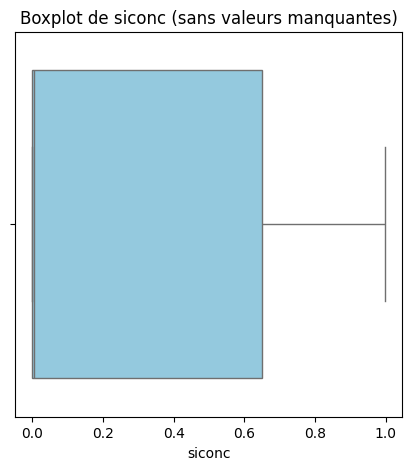

In [45]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=siconc_clean, color="skyblue")

# Ajouter un titre
plt.title("Boxplot de siconc (sans valeurs manquantes)")

# Afficher le graphique
plt.show()

In [42]:
siconc_clean.shape

(3622758,)

In [37]:
siconc_clean.median()

0.0037420191394371446

In [40]:
siconc_clean.mean()

0.278241172733286

In [29]:
import numpy as np

# Rayon moyen de la Terre en km
R = 6371  

# Différence approximative entre les latitudes
df["lat_diff"] = df["latitude"].diff().abs()
df["lon_diff"] = df["longitude"].diff().abs()

# Approximation de l'aire de chaque cellule en km²
df["cell_area_km2"] = (np.pi / 180) * R**2 * df["lat_diff"] * df["lon_diff"]


In [33]:
df["latitude"].isna().mean() * 100


0.0

In [35]:
df["cell_area_km2"].describe()

count    1.167878e+07
mean     3.418800e+04
std      2.523115e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.664618e+02
max      2.369513e+08
Name: cell_area_km2, dtype: float64

In [39]:
df["siconc"].unique()[:10]

array([       nan, 0.        , 0.00015065, 0.00015037, 0.00155735,
       0.00091107, 0.00029125, 0.00325445, 0.00818118, 0.00849983])

In [38]:
len(df["siconc"].unique())

895390

In [21]:
df["time"].unique()


<DatetimeArray>
['2019-08-16 12:00:00']
Length: 1, dtype: datetime64[ns]

In [7]:
df.columns

Index(['y', 'x', 'time', 'nv', 'stereographic', 'longitude', 'latitude',
       'time_bnds', 'siconc', 'sithick', 'sisnthick', 'vxsi', 'vysi', 'sialb',
       'siage', 'siconc_my', 'siconc_young', 'si_ridge_ratio'],
      dtype='object')

In [17]:
df.shape

(11678778, 18)

In [8]:
# Sélectionner les variables d'intérêt
variables = ['sithick', 'siconc', 'sialb', 'siage']

# Analyse descriptive pour chaque variable
desc_stats = df[variables].describe()

# Afficher les statistiques descriptives
desc_stats


,sithick,siconc,sialb,siage
count,3.622758e+06,3.622758e+06,3.622758e+06,1.167878e+07
mean,5.167500e-01,2.782412e-01,3.021306e-01,6.876760e+36
std,8.598010e-01,3.561844e-01,3.562181e-01,4.611511e+36
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,6.741743e-01
50%,4.505455e-04,3.742019e-03,9.776126e-03,9.969210e+36
75%,8.890597e-01,6.509891e-01,7.821900e-01,9.969210e+36
max,4.368277e+00,9.977385e-01,8.414821e-01,9.969210e+36


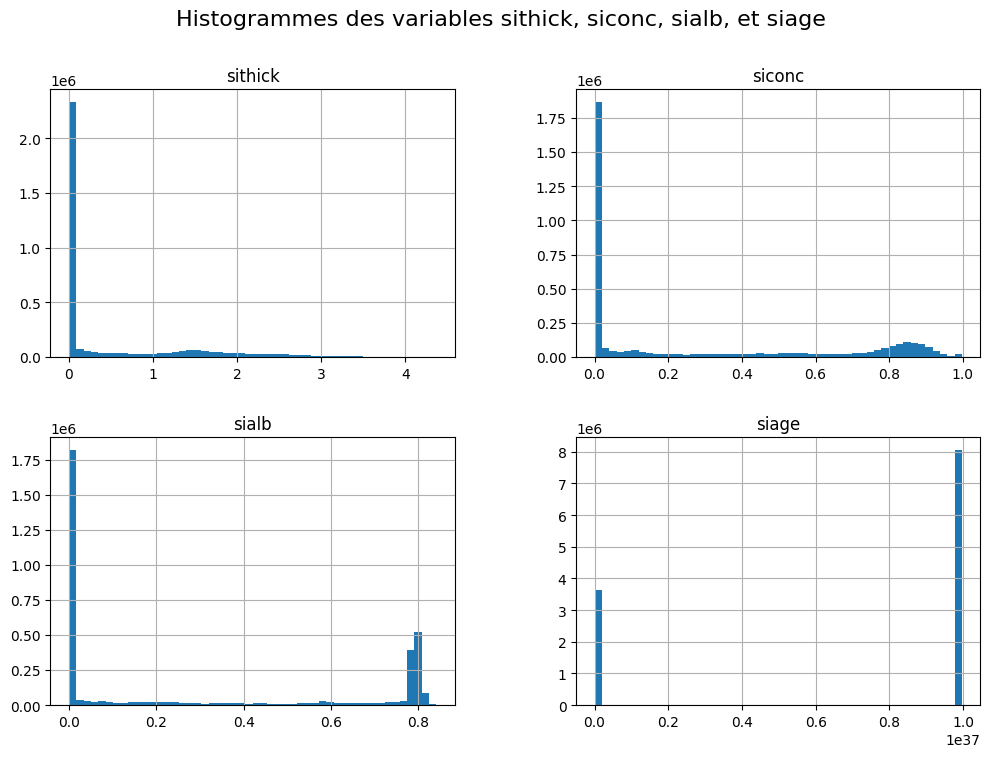

In [11]:
import matplotlib.pyplot as plt

# Créer des histogrammes pour chaque variable
df[variables].hist(bins=50, figsize=(12, 8))
plt.suptitle('Histogrammes des variables sithick, siconc, sialb, et siage', fontsize=16)
plt.show()


          sithick    siconc     sialb     siage
sithick  1.000000  0.887008  0.807589  0.914241
siconc   0.887008  1.000000  0.968628  0.822196
sialb    0.807589  0.968628  1.000000  0.800331
siage    0.914241  0.822196  0.800331  1.000000


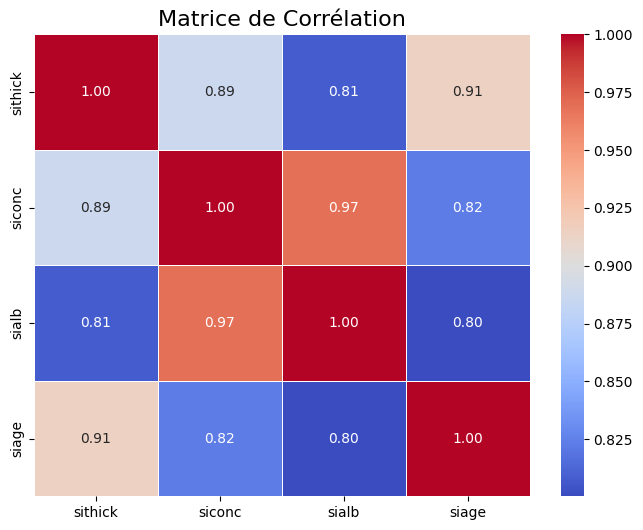

In [16]:
# Calculer la matrice de corrélation
correlation_matrix = df[variables].corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

# Visualiser la matrice de corrélation avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation', fontsize=16)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8980\2888310633.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8980\2888310633.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8980\2888310633.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8980\2888310633.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[va

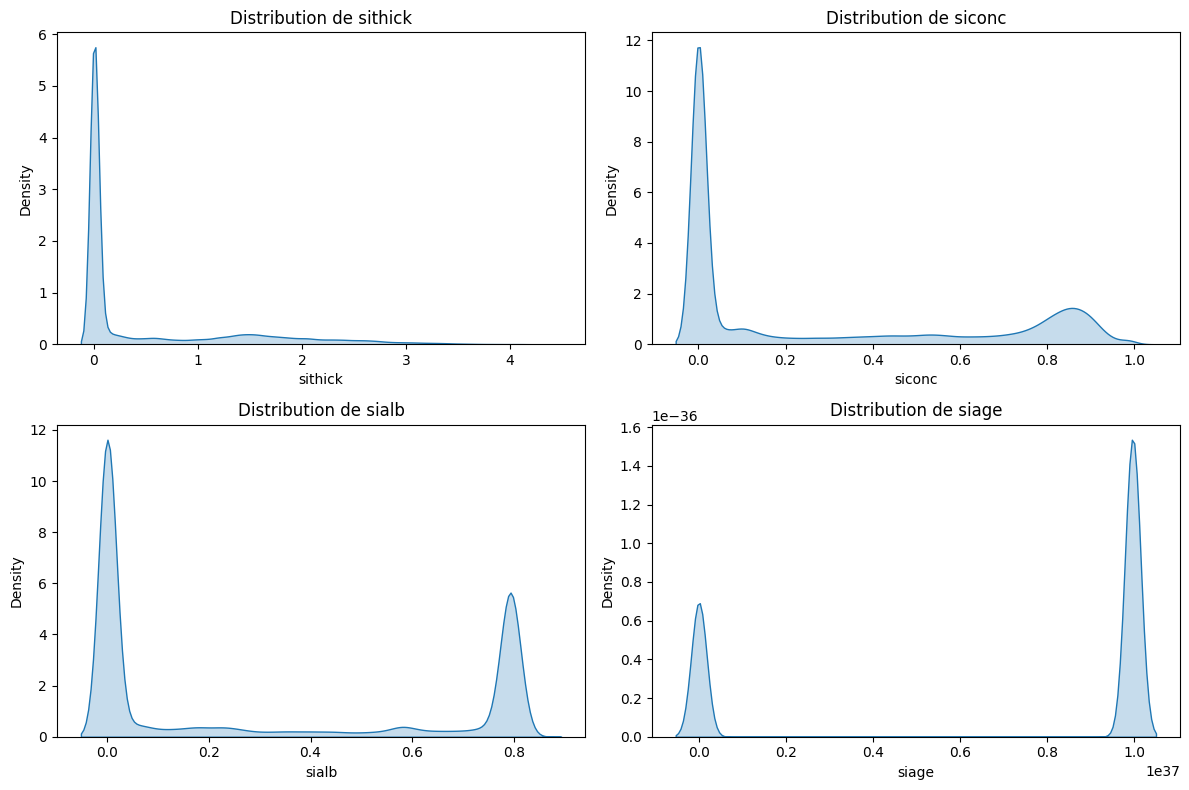

In [15]:
import seaborn as sns
# Densité des variables
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(df[var], shade=True)
    plt.title(f'Distribution de {var}')
plt.tight_layout()
plt.show()
